Let's  analyze the performance of supermarkets in several cities. NOTE! In this dataset, we will consider each row (unique Invoice ID) as one supermarket visit.

Using the Pandas, read the dataset from the file 'supermarket_sales.csv'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

In [2]:
supermarket_sales = pd.read_csv('data/supermarket_sales.csv')

Next, let's examine the structure of the data by looking on the first and last records of the dataset.

In [3]:
display(supermarket_sales[:4],supermarket_sales [-4:])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.80,4.761905,48.690,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.592,33.432,2/9/2019,13:22,Cash,31.84,4.761905,1.592,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761905,3.291,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.919,649.299,2/18/2019,13:28,Cash,618.38,4.761905,30.919,6.6




We will analyze the dimensions of the dataset. To accomplish this, we'll display the count of rows and columns within the dataset. We'll structure the response using an f-string.

In [4]:
df_shape = supermarket_sales.shape
print(f'The DataSet has {df_shape[0]} rows та {df_shape[1]} columns.')

The DataSet has 1000 rows та 17 columns.


Next, we will examine the data and the data's types. We will output the column names in the dataset along with their respective types and proceed to assess the quantity of different data types present in the dataset.

In [5]:
supermarket_sales.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [6]:
supermarket_sales.dtypes.value_counts()

object     9
float64    7
int64      1
Name: count, dtype: int64

Let's answer the question: How many total visits (number of invoices) were made by customers with different types of clients (`Customer type`)?

In [7]:
supermarket_sales.groupby('Customer type')['Invoice ID'].nunique()

Customer type
Member    501
Normal    499
Name: Invoice ID, dtype: int64

What are the product lines (column 'Product line') in the dataset? Let's output the unique names.

In [8]:
display(
    list(supermarket_sales['Product line'].unique())
)

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

What is the average price of a product in each product line? The price of the product is contained in the column 'Unit price'.

In [9]:
supermarket_sales.groupby('Product line')['Unit price'].mean()

Product line
Electronic accessories    53.551588
Fashion accessories       57.153652
Food and beverages        56.008851
Health and beauty         54.854474
Home and lifestyle        55.316937
Sports and travel         56.993253
Name: Unit price, dtype: float64

Which invoice (row in this dataset) has brought the store the highest gross income (gross income)? Please output the data row with the highest store income.

In [10]:
display(
    supermarket_sales.iloc[supermarket_sales['gross income'].idxmax()]
)

Invoice ID                         860-79-0874
Branch                                       C
City                                 Naypyitaw
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                                99.3
Quantity                                    10
Tax 5%                                   49.65
Total                                  1042.65
Date                                 2/15/2019
Time                                     14:53
Payment                            Credit card
cogs                                     993.0
gross margin percentage               4.761905
gross income                             49.65
Rating                                     6.6
Name: 350, dtype: object

Which branch of the store ('Branch') is the most profitable? What is the total income it has, and in which city is it located?

In [11]:
max_gross_branch = supermarket_sales.groupby('Branch')['gross income'].sum().sort_values(ascending=False)
ind = supermarket_sales[supermarket_sales['Branch'] == max_gross_branch.index[0]].index.values.astype(int)
ind = ind[0]
print(f'The branch {max_gross_branch.index[0]} is the most profitable. The gross income is {max_gross_branch.iloc[0]} The branch is located in {supermarket_sales.loc[ind].City}.')

The branch C is the most profitable. The gross income is 5265.1765 The branch is located in Naypyitaw.


Let's check if the gross margin percentage differs for different visits (invoices) in the store.


In [12]:
if np.alltrue(supermarket_sales['gross margin percentage'] == supermarket_sales['gross margin percentage'].mean()):
    print("The gross margin is constant  across all visits.")
else:
    print("The gross margin is varying for different visits.")

The gross margin is constant  across all visits.


Which branch of the store ('Branch') has the highest number of visits (invoices) with purchases of electronic accessories ('Electronic accessories')?

In [13]:
pivot = supermarket_sales.pivot_table(
    index=['Branch'],
    columns=['Product line'],
    values=['Invoice ID'],
    aggfunc='count'
)

pivot.columns = pivot.columns.droplevel(0)
pivot.style.background_gradient(subset=['Electronic accessories'], cmap='viridis')


Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


Let's output the number of visits (invoices) hourly and make a conclusion about when the store has the most customers (here we understand one visit as one invoice). To do this, we'll create a new column in the dataset named "Hour". The column type will be 'int'. We'll output the column type and the first 5 records.

In [14]:
supermarket_sales['Hour'] = supermarket_sales.Time.apply(lambda x: x[:2]).astype('int64')

print(supermarket_sales.Hour[:5])
supermarket_sales.Hour.dtypes

0    13
1    10
2    13
3    20
4    10
Name: Hour, dtype: int64


dtype('int64')

In [15]:
display(supermarket_sales.Hour.value_counts().sort_index (ascending=True).to_frame().T)

Hour,10,11,12,13,14,15,16,17,18,19,20
count,101,90,89,103,83,102,77,74,93,113,75


I suppose, that the main purchases occur in the morning (visitors are  buying  something before work), during lunchtime from 13:00 to 15:00 (there is an interesting point here that at 14:00 the volume of purchases slightly decreases. I think this happens because people are eating their lunches and they either make purchases before eating or after). The next increasing of purchases occurs in the evening).

Let's analyze purchases based on time. Our goal is to understand when the most customers are in the supermarket, what they are buying, and to leverage the fact that customers are already present to encourage them to purchase goods actively. We aim to identify periods of decline and initiate the development of strategies to maintain a sufficiently high level of purchases for the company.

In [16]:
pivot = supermarket_sales.pivot_table(
    index=['Hour'], 
    columns=['Product line'], 
    values=['Invoice ID'], 
    aggfunc= ['count'] ,margins = True, margins_name = 'Total'
)
pivot.columns = pivot.columns.droplevel(0)
pivot.columns = pivot.columns.droplevel(0)
pivot.drop(pivot.tail(1).index, inplace=True)

my_columns = [x for x in pivot.columns if 'Total' not in x]
pivot.style.background_gradient(subset = my_columns,cmap = 'viridis', axis=None)

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Total
Hour,,,,,,,
10,17,14,20,17,18,15,101
11,18,14,11,10,21,16,90
12,16,19,10,14,14,16,89
13,13,19,15,17,20,19,103
14,14,15,12,19,9,14,83
15,15,18,21,12,19,17,102
16,11,12,16,10,8,20,77
17,14,13,6,11,17,13,74
18,20,19,17,14,11,12,93


In [17]:
hour_categories = list(supermarket_sales.Hour.unique())
hour_categories.sort()
supermarket_sales.Hour = pd.Categorical(supermarket_sales.Hour, categories=hour_categories)

In [18]:

supermarket_sales_hour = supermarket_sales[['Hour','Invoice ID','Product line','gross income']].groupby(
    by=['Product line','Hour'],
    observed=True,
    as_index=False
).agg({
    'Invoice ID':'count',
    'gross income': 'sum'
}).rename(
    columns=({
        'Invoice ID':'Count',
        'gross income': 'Total gross income'
    })
)


display(supermarket_sales_hour)

,Product line,Hour,Count,Total gross income
0,Electronic accessories,10,17,200.8460
1,Electronic accessories,11,18,283.3420
2,Electronic accessories,12,16,163.9545
3,Electronic accessories,13,13,184.6250
4,Electronic accessories,14,14,271.1225
...,...,...,...,...
61,Sports and travel,16,20,245.5135
62,Sports and travel,17,13,183.2175
63,Sports and travel,18,12,172.7905
64,Sports and travel,19,20,424.6785


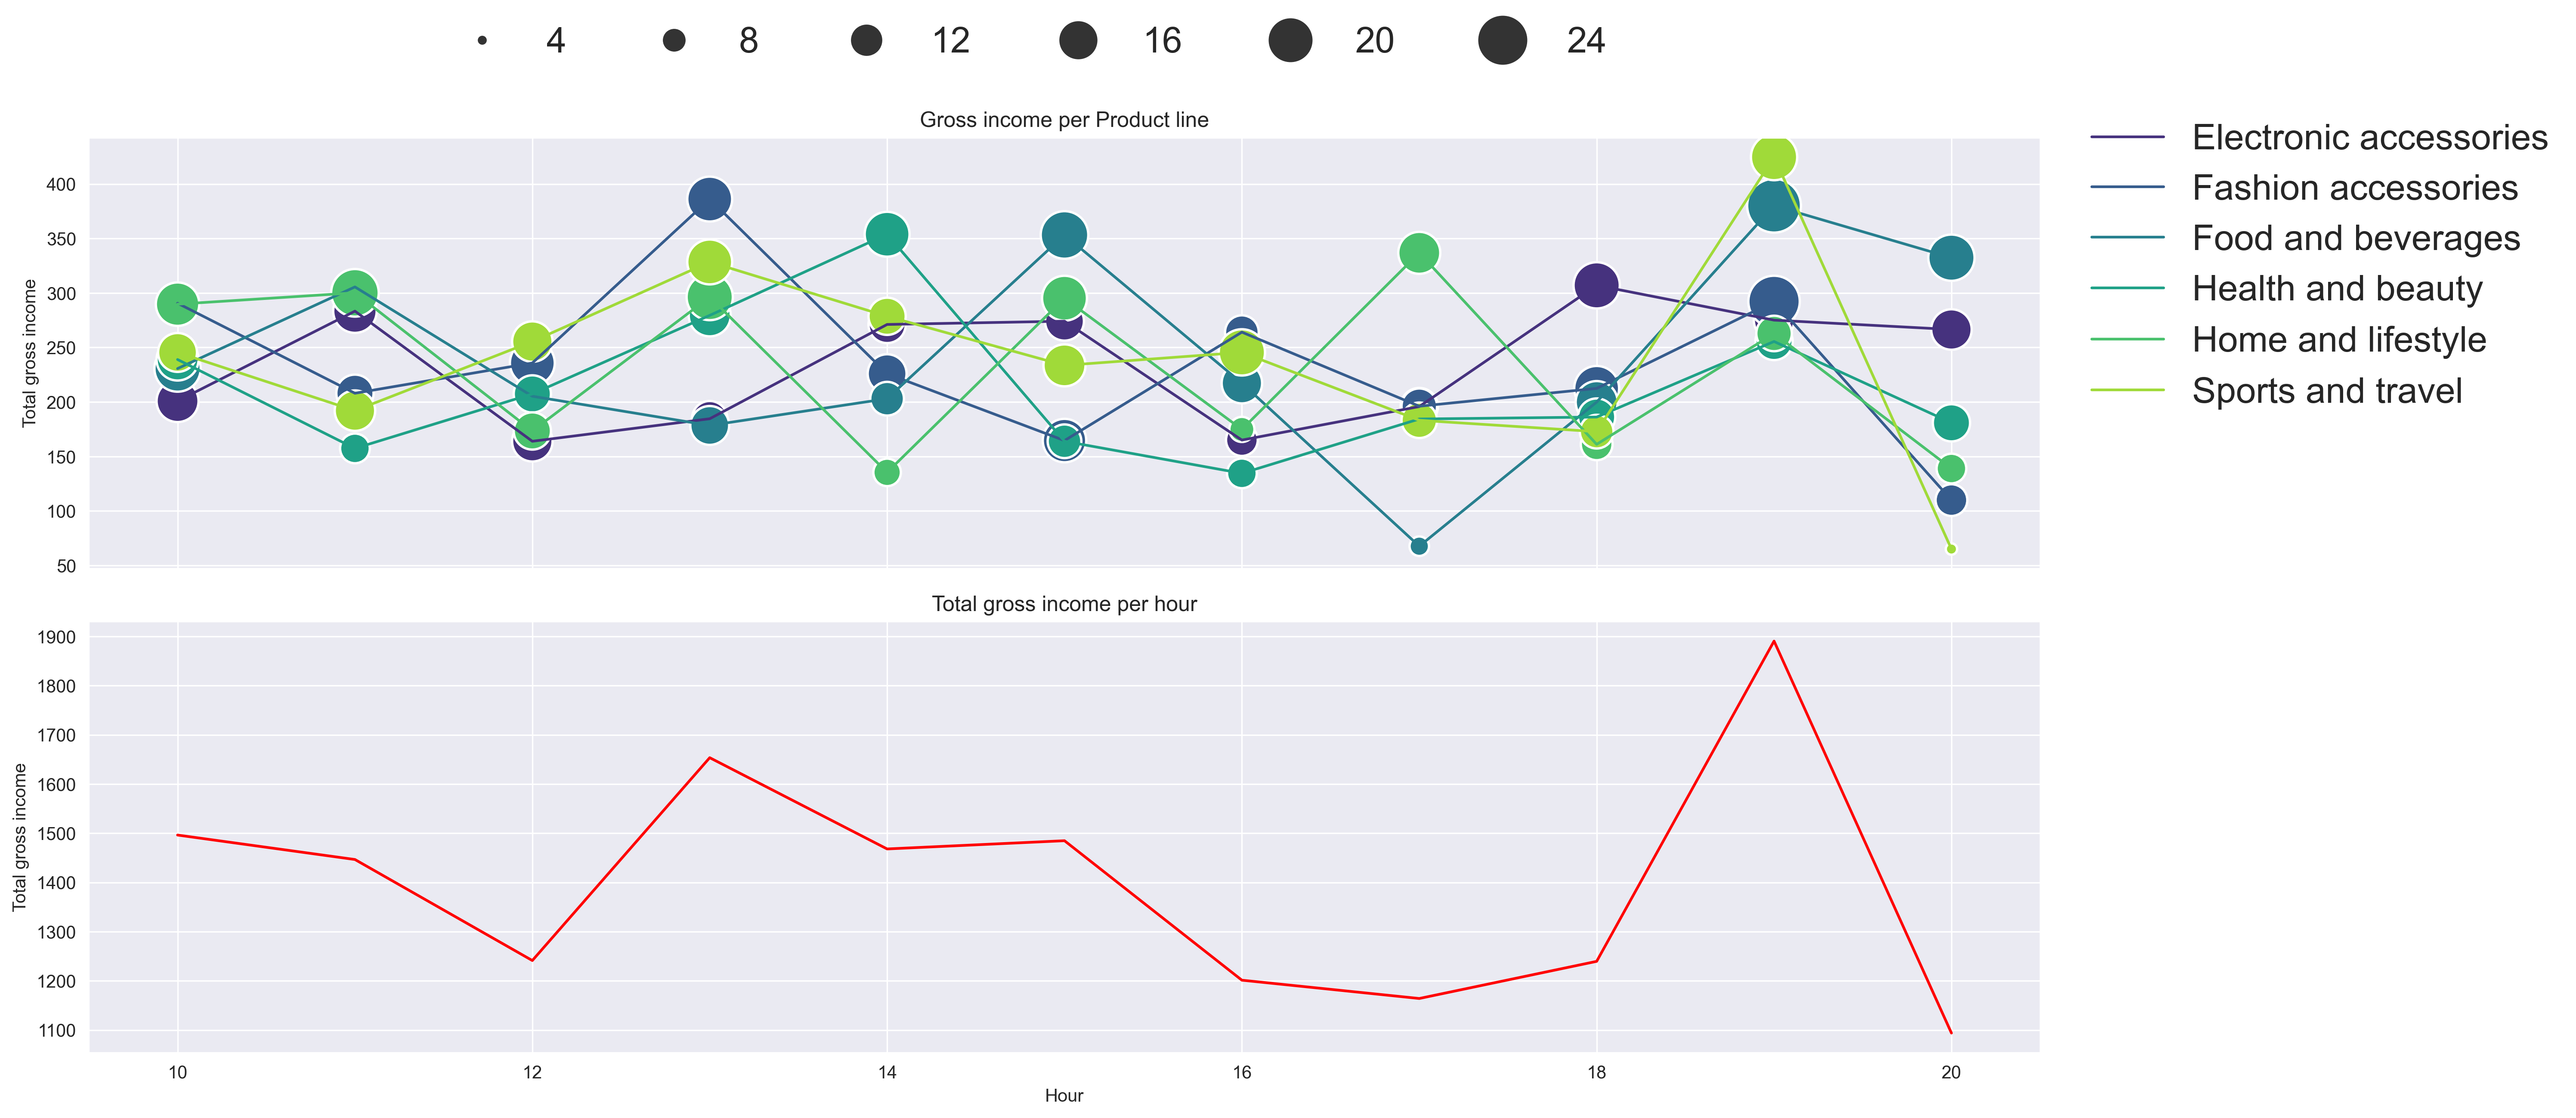

In [19]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8), dpi=300)

g = sns.lineplot(
    ax=axes[0],
    data=supermarket_sales_hour,
    x='Hour', 
    y='Total gross income',
    hue='Product line', 
    estimator = None,
    palette="viridis",
 )


axes[0].set_title('Gross income per Product line')
handles_lineplot, labels_lineplot = g.get_legend_handles_labels()
fig.legend(
    handles=handles_lineplot,
    labels=labels_lineplot,
    ncol=1,
    fontsize='20',
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title=None,
    frameon=False
)

g = sns.scatterplot(
    ax=axes[0],
    data=supermarket_sales_hour,
    x='Hour', 
    y='Total gross income',
    hue='Product line', 
    size = 'Count',
    sizes=(40, 900),
    palette="viridis",
   
)

handles_scatterplot, labels_scatterplot = g.get_legend_handles_labels()
fig.legend(
    handles=handles_scatterplot[-6:],
    labels=labels_scatterplot[-6:],
    ncol=6,
    fontsize='20',
    loc='lower center',
    bbox_to_anchor=(.5, 1),
    title=None,
    frameon=False
    
)
axes[1].set_title('Total gross income per hour')
g = sns.lineplot(
    ax=axes[1],
    data=supermarket_sales_hour.groupby('Hour',observed=True,
    as_index=False,).agg(
        {'Total gross income':'sum'}),
    x='Hour', 
    y='Total gross income',
    estimator = None,
    color = 'red',
   
)

axes[0].legend().set_visible(False)
plt.tight_layout()
plt.show();

Basing on analyzing purchasing demand on hour's time, the following conclusions can be provided:

1. The sales in the Home and Lifestyle department are extremely low. It's necessary to increase the number of purchases of products in this category, and at least bring them up to the average level of other departments. It would be good to analyze the conversion rate of all visitors to this department and the percentage of purchases. Perhaps the issue lies in the high number of visits but low conversion into purchases (possibly due to dissatisfaction with the assortment, low level of consultant expertise, or high prices).

2. From 16:00 to 18:00, there is a significant decrease in gross income and the number of customers. To increase the number of visits and purchases as a result, I suggest proceeding some marketing activities like a "Happy Hours" or offer special propositions to customers.

3. There is a sharp increase of the numbers of purchases after 19:00 and up to 20:00 at the Food and Beverages department. I suppose it should be used to provide some promotional and informational campaigns (leveraging the fact that customers are already in the store and don't need to be attracted, but rather encouraged to make purchases). For example, this would be a good time to introduce customers to new products entering the market through food tastings or demonstrations of household items, etc.

The next step is to analyze the average purchase amount of the men and women based on time. We will also examine how the number of purchases changes throughout the day.

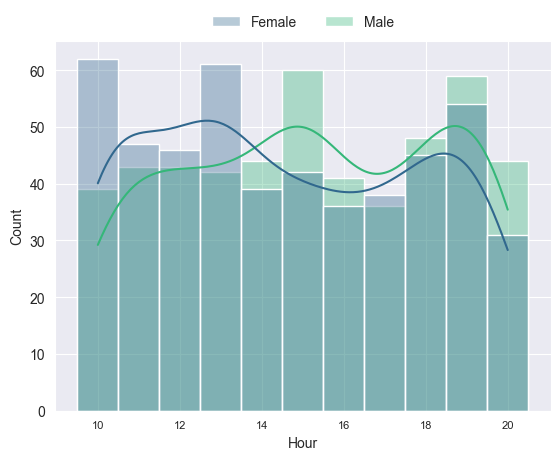

In [20]:
g = sns.histplot(
    data=supermarket_sales.sort_values(by=['Gender']), bins=11,
    alpha=0.35, palette="viridis",
    x = 'Hour', hue="Gender", kde=True
)

sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 1),
    ncol=len(supermarket_sales['Gender'].unique()),
    title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);


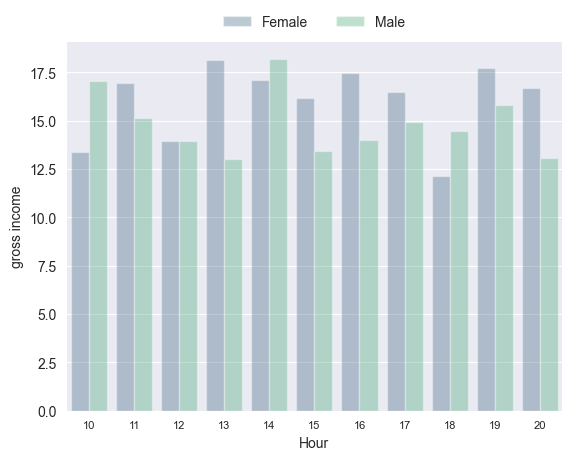

In [21]:
g = sns.barplot(
    data=supermarket_sales,
    alpha=0.35, palette="viridis",estimator="mean", errorbar=None,
    x = 'Hour', y ='gross income', hue="Gender"
)

sns.move_legend(
    g, "lower center", bbox_to_anchor=(.5, 1),
    ncol=len(supermarket_sales['Gender'].unique()),
    title=None, frameon=False,
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);


In [22]:
import warnings
warnings.filterwarnings("ignore")

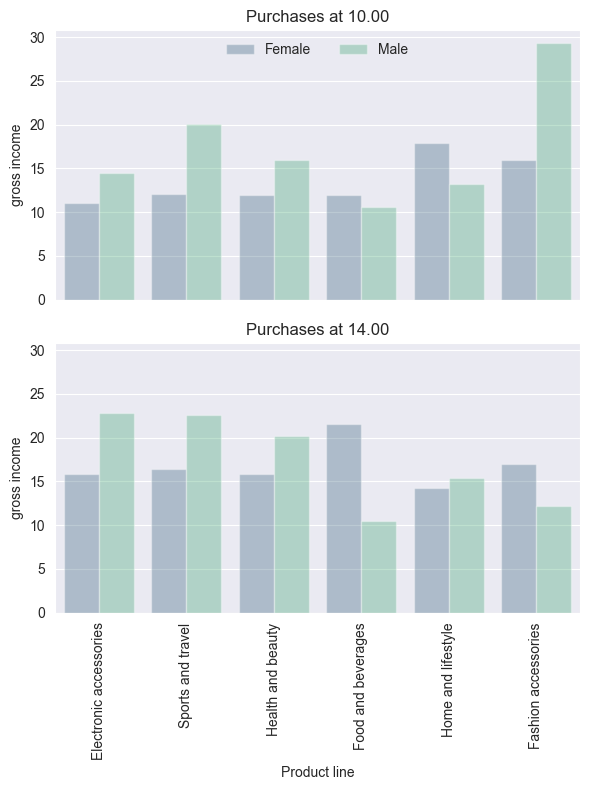

In [23]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(6,8))

g = sns.barplot(
    ax=axes[0],
    data=supermarket_sales[supermarket_sales.Hour == 10],
    alpha=0.35, palette="viridis", estimator="mean", errorbar=None,
    x = 'Product line', y ='gross income', hue="Gender",
    legend=True,
)

axes[0].set_title('Purchases at 10.00')
sns.move_legend(
    g, "upper center", bbox_to_anchor=(.5, 1),
    ncol=len(supermarket_sales['Gender'].unique()),
    title=None, frameon=False,
)


g = sns.barplot(
    ax=axes[1],
    data=supermarket_sales[supermarket_sales.Hour == 14],
    alpha=0.35, palette="viridis", estimator="mean", errorbar=None,
    #height=5, aspect=2,
    x = 'Product line', y ='gross income', hue="Gender",
    legend=True,
)

axes[1].set_title('Purchases at 14.00')
axes[1].legend().set_visible(False)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show();

CONCLUSIONS:

Women make more purchases in the first half of the day, while men shop more after lunch.
The highest average check for men is at 14:00. Then, at 15:00, there is a sharp increase in the number of purchases, but the average check decreases. We should consider how to encourage men to spend more during their peak consumer activity, may be, by perhaps promoting more expensive alternatives of products. Increasing the number of consultant, who can assist customers in selecting products, may be also good.

It's interesting to note that the men make fewer purchases but with higher price at 10:00, while women, on the contrary, make more small purchases. Furthermore, when we separately analyzed the categories of products with the highest interest among men and women at 10:00 and at 14:00, we found that during these two hours, the distribution of purchase preferences among the men remains constant except for the category of Fashion accessories. The interest in this category sharply increases at 10:00 among the men. Perhaps this is because of the men making online purchases and picking up their purchases before work. However, for accurate conclusions and recommendations, it's necessary to conduct consultations with colleagues to validate these conclusions.

There is a significant presence of men in the store at 19:00. I believe that the men are purchasing after work on a way to home. It will be good for flower's shops, as an example, to offer discounts on bouquets that have been on showing throughout the day, encouraging the men to purchase them for their loved ones or mom's.

During the next step, I'll examine the effectiveness of the loyalty program. To do this, I need to assess the number of purchases made by the men and the women who are participant in the loyalty program and those who are not. I'll also check the average purchase amount across different consumer categories.

In [24]:
pivot = supermarket_sales.pivot_table(
    index=['Gender'], 
    columns=['Customer type'], 
    values=['gross income'], 
    aggfunc= ['count','mean']
)
pivot

count                mean           
              gross income        gross income           
Customer type       Member Normal       Member     Normal
Gender                                                   
Female                 261    240    16.082274  15.820631
Male                   240    259    15.094544  14.526075

Next, I'll examine whether there is a statistically significant difference in the average gross income for customers who are members of the loyalty program and those who are not. We will use a z-test for this analysis, with a significance level (alpha) of 0.05.

H0 (Null Hypothesis): There is no difference between the gross income generated by customers who are members of the loyalty program and those who are not.
H1 (Alternative Hypothesis): There is a significant difference in the gross income between members of the loyalty program and non-members.

In [25]:
alpha = 0.05

In [26]:
member = supermarket_sales[supermarket_sales['Customer type'] == 'Member']['gross income'].to_numpy()
normal = supermarket_sales[supermarket_sales['Customer type'] == 'Normal']['gross income'].to_numpy()

In [27]:
ztest_results = ztest(member, normal, value = 0)

In [28]:
ztest_results

(0.6215268724928255, 0.5342530191211695)

In [29]:
if (ztest_results[1] < alpha):
    print('We reject the null hypothesis (H0). There is a significant difference in gross income between members of the loyalty program and non-members.')
else:
    print('We fail to reject the null hypothesis (H0). There is no significant difference in gross income between members of the loyalty program and non-members.')

We fail to reject the null hypothesis (H0). There is no significant difference in gross income between members of the loyalty program and non-members.


In [30]:
print(f'The total gross income of customers who are the members of the loyalty program is- {{:.2f}}\nThe total gross income of customers who are not the members of the loyalty program is - {{:.2f}}'.format(member.sum(), normal.sum()))

The total gross income of customers who are the members of the loyalty program is- 7820.16
The total gross income of customers who are not the members of the loyalty program is - 7559.20


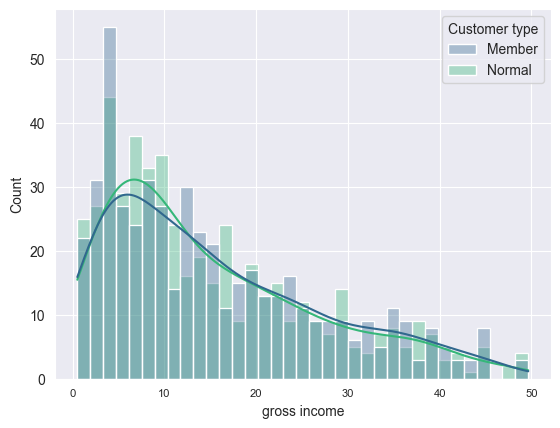

In [31]:
sns.histplot(
    data=supermarket_sales.sort_values(by=['Customer type']), bins=35,
    alpha=0.35, palette="viridis",
    x = 'gross income', hue="Customer type", kde=True
)

plt.yticks(fontsize=10)
plt.xticks(fontsize=8);

If to resist from making statistical tests and provide examining the effectiveness of the loyalty program basing only of the analyzing the average profit for these customer's categories, conjoining also classification by gender (proposing that the behavior of the men and the women is different in the equal situation), we can provide the following conclusions:

Regardless of gender, the average gross income of customers who are using in the loyalty program is higher than in the others customers. Therefore, the company is interested in expanding its loyalty program to all customers.

It is needed to note additionally that among the male customers, the number of non-loyalty program users is higher than those who use it.

Hence, basing only on these explorations, I could recommend providing an upgrading the loyalty program to be attractive to the men audience.
Overall, there is a need to increase customer engagement in the loyalty program in general because of the significant number of customers who are not in the loyalty program.

On the other hand, when we made the statistical test, we found out that the gross income for customers who are members of the loyalty program and those who are not in it does not differ statistically. 


The final decision should be made after consulting with colleagues from the marketing and sales department. In any case, to make an informed decision, more than just evaluating the data is needed. Additional research may be required. 
